## Finding Data, Loading into Pandas, Cleaning and Visualizing it using Matplotlib
This weeks homework is intended to spur you into the world on opensource data repositories in order to create the visualizations. 

You will need to find a good dataset, preprocess the data as necessary, set up their plotting environment, and then use the appropriate plotting functions to visualize the data.

You will also need to add labels, titles, legends, and other necessary plot elements to make your visualizations clear and informative.

1.**COVID-19 Data Visualization**
Potential Source: Johns Hopkins University COVID-19 Data Repository, Our World in Data.

Bar Chart: Show the total number of COVID-19 cases in the top 10 affected countries.
Line Graph: Plot the trend of daily new cases over time for a specific country.

Overall Steps
* Go through & find data for all these in the databases (then circle back after doing so...so you're not overwhelmed)
* Do python analysis of all data

Python Part A:
* Pull file into Python
* Aggregate total Covid-19 cases based on country (using groupby & stuff)

Python Part B:
* Focus on a specific country and plot the trend over time for new cases (just pull Afghanistan)

In [6]:
# Import matplotlib, pandas, etc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [7]:
#Pull in the csv file
covid = pd.read_csv("hw_9_q1.csv")

#See if it worked
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Brazil'),
  Text(1, 0, 'China'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'India'),
  Text(5, 0, 'Italy'),
  Text(6, 0, 'Russia'),
  Text(7, 0, 'South Korea'),
  Text(8, 0, 'United Kingdom'),
  Text(9, 0, 'United States')])

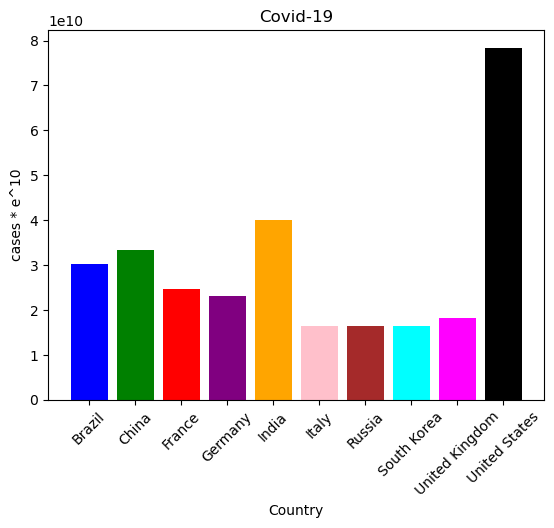

In [8]:
result = covid.groupby('location')['total_cases'].sum().reset_index()

#Add a rank column to rank them by total_cases accumulated
result['rank'] = result['total_cases'].rank(ascending=False)

#take out the locations that are continents & only leave the top 10 based on total cases
NA_groups = ["Asia","Europe","European Union","High income","Lower middle income","North America","South America","Upper middle income","World"]
top_countries = result.query("rank <= 19 & location not in @NA_groups")

#make a list of colors to use for your bar chart
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'cyan', 'magenta', 'k']

#create teh bar chart with x axis as locaito nand y as total cases. Change all the features to make it pretty and readable
plt.bar(top_countries["location"],top_countries["total_cases"],color = colors)
plt.xlabel("Country")
plt.ylabel("cases * e^10" )
plt.title("Covid-19")
plt.xticks(rotation=45)

In [9]:
#For section 2, query just afghanistan
afg_alone = covid.query("location == 'Afghanistan'")
afg_alone.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Total cases over time in Afghanistan')

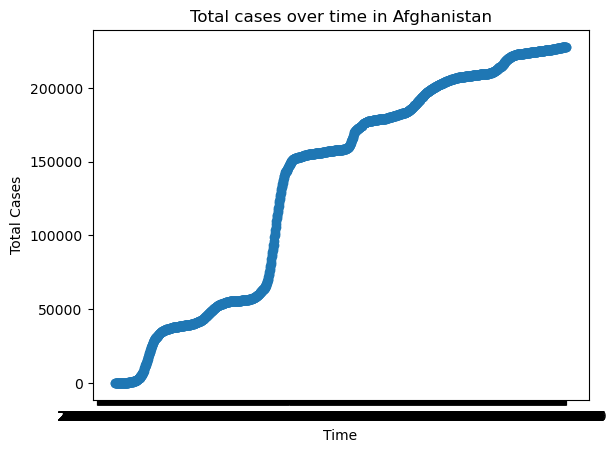

In [10]:
#plot it on a scatter plot over time
plt.scatter(afg_alone["date"],afg_alone["total_cases"])
plt.xlabel("Time")
plt.ylabel("Total Cases")
plt.title("Total cases over time in Afghanistan")

2.**Global GDP Comparison**
Potential Source: The World Bank's World Development Indicators, International Monetary Fund (IMF).
Line Graph: Compare the GDP trends of several countries over the last decade.
Stacked Bar Chart: Display the GDP composition of a country by different sectors (agriculture, industry, services) over time.

Text(0.5, 1.0, 'Covid Cases in 5 Countries over time')

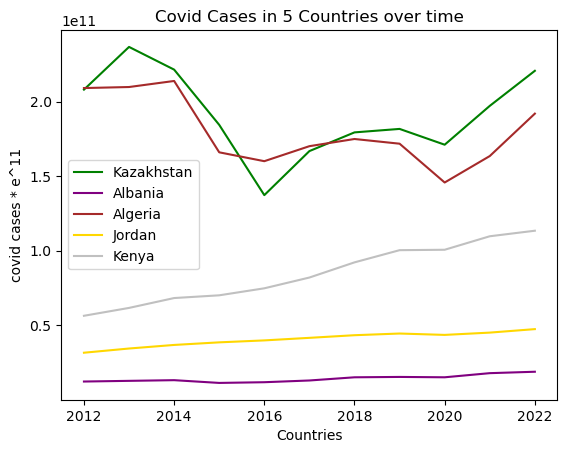

In [11]:
#Your code here:

#PART 1

#Read the CLEANED data into the python
gdp = pd.read_csv("hw_9_q2_part1.csv", encoding='latin1')

#Set the index to year to simplify things
gdp.set_index("Year", inplace = True)

#Take a look at the data
gdp.head()

#Plot them all
plt.plot(gdp.Kazakhstan, color= 'green')
plt.plot(gdp.Albania, color= 'purple')
plt.plot(gdp.Algeria, color= 'brown')
plt.plot(gdp.Jordan, color= 'gold')
plt.plot(gdp.Kenya, color= 'silver')

#Create a legend
plt.legend(["Kazakhstan","Albania","Algeria","Jordan","Kenya"])
plt.xlabel("Countries")
plt.ylabel("covid cases * e^11")
plt.title("Covid Cases in 5 Countries over time")

In [12]:
#PART 2

#Read the CLEANED data into python
gdp_part2 = pd.read_csv("hw_9_q2_part2.csv", encoding='UTF-8')

#Set the index
gdp_part2.set_index("Year", inplace = True)

gdp_part2.head()

,"Agriculture, forestry, and fishing, value added (% of GDP)","Manufacturing, value added (% of GDP)","Services, value added (% of GDP)","Industry (including construction), value added (% of GDP)"
Year,,,,
2012,1.348551,16.706123,62.000855,25.633969
2013,1.254721,16.495729,62.326583,25.524942
2014,1.200741,16.560015,62.653793,25.364640
2015,1.129790,16.690036,62.880636,25.174913
2016,1.110316,17.047415,62.603491,25.476805


Text(0.5, 1.0, '% of GDP breakdown for Albania')

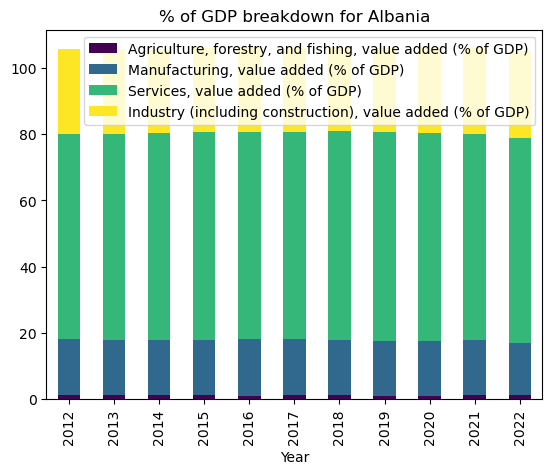

In [13]:
gdp_part2_plot = gdp_part2.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("% of GDP breakdown for Albania")

3.**World Population Growth**
Potential Source: The World Bank, United Nations Population Division.
Histogram: Represent the distribution of country populations.
Scatter Plot: Illustrate the relationship between population and another variable such as land area or GDP.

In [14]:
#Your code here:

#Read it into python
population = pd.read_csv("hw_9_q3_part1.csv")

population.set_index("Country", inplace = True)

population.head(10)

,Population_in_mm
Country,
Burundi,13
Comoros,1
Djibouti,1
Eritrea,4
Ethiopia,120
Kenya,53
Madagascar,29
Malawi,20
Mauritius,1


Text(0.5, 0, 'Population Count in millions (2021)')

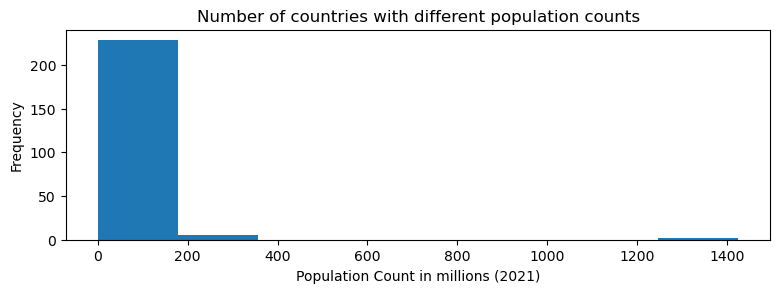

In [15]:
fig_pop = plt.figure(figsize = (20,6))
ax1_pop = fig_pop.add_subplot(2,2,1)


#Create histogram
ax1_pop.hist(population.Population_in_mm, bins = 8)
plt.title("Number of countries with different population counts")
plt.ylabel("Frequency")
plt.xlabel("Population Count in millions (2021)")


In [16]:
#Create scatter plot for part 2

#Read it into python
compare_q3 = pd.read_csv("hw_9_q3_part2.csv")

compare_q3.set_index("Country", inplace = True)


compare_q3.head()

,gdp_in_B,Population_in_mm
Country,,
Afghanistan,15,40.0
Albania,18,3.0
Algeria,163,44.0
American Samoa,1,0.0
Andorra,3,0.0


In [17]:
compare_q3.columns

Index([' gdp_in_B ', 'Population_in_mm'], dtype='object')

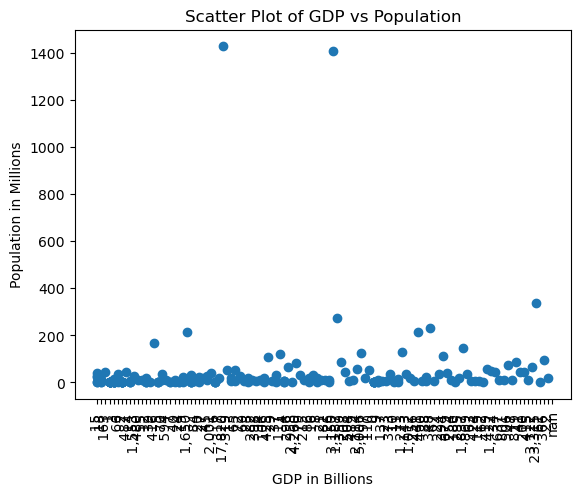

In [18]:
import matplotlib.pyplot as plt

# Convert 'gdp_usd' to string
compare_q3['gdp_in_B'] = compare_q3[' gdp_in_B '].astype(str)

# Create scatter plot
plt.scatter(compare_q3['gdp_in_B'], compare_q3['Population_in_mm'])

# Add labels and title
plt.xlabel('GDP in Billions')
plt.ylabel('Population in Millions')
plt.title('Scatter Plot of GDP vs Population')
plt.xticks(rotation=90)

# Show the plot
plt.show()

4.**Climate Change Indicators**
Potential Source: NASA's climate change dataset, Global Carbon Project.
Line Graph: Show the trend of average annual temperatures for a set of countries over the last century.
Bar Chart: Compare the total CO2 emissions by top emitting countries in the most recent year available.

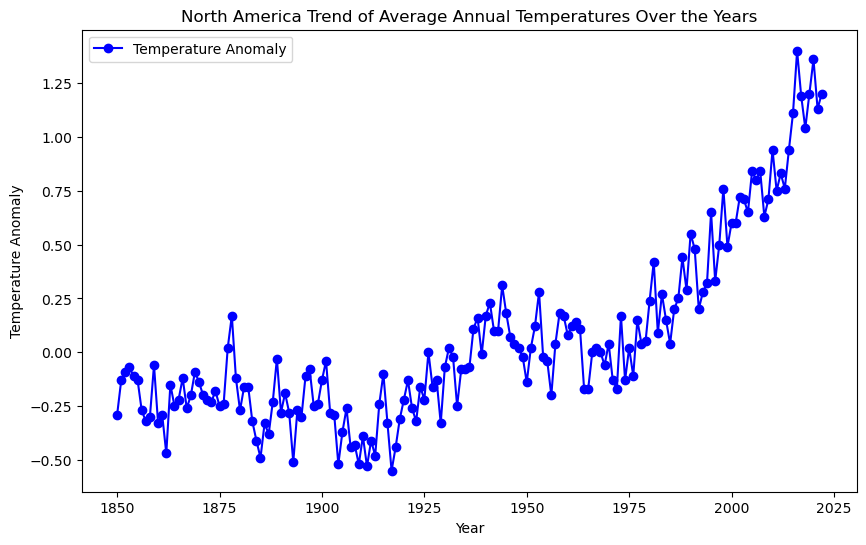

In [20]:
import pandas as pd

#Your code here:
temp = pd.read_csv("hw_9_q4_temp_anom.csv")

plt.figure(figsize=(10, 6))

plt.plot(temp['Year'], temp['Anomaly'], marker='o', linestyle='-', color='b', label='Temperature Anomaly')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.title('North America Trend of Average Annual Temperatures Over the Years')

# Show legend
plt.legend()


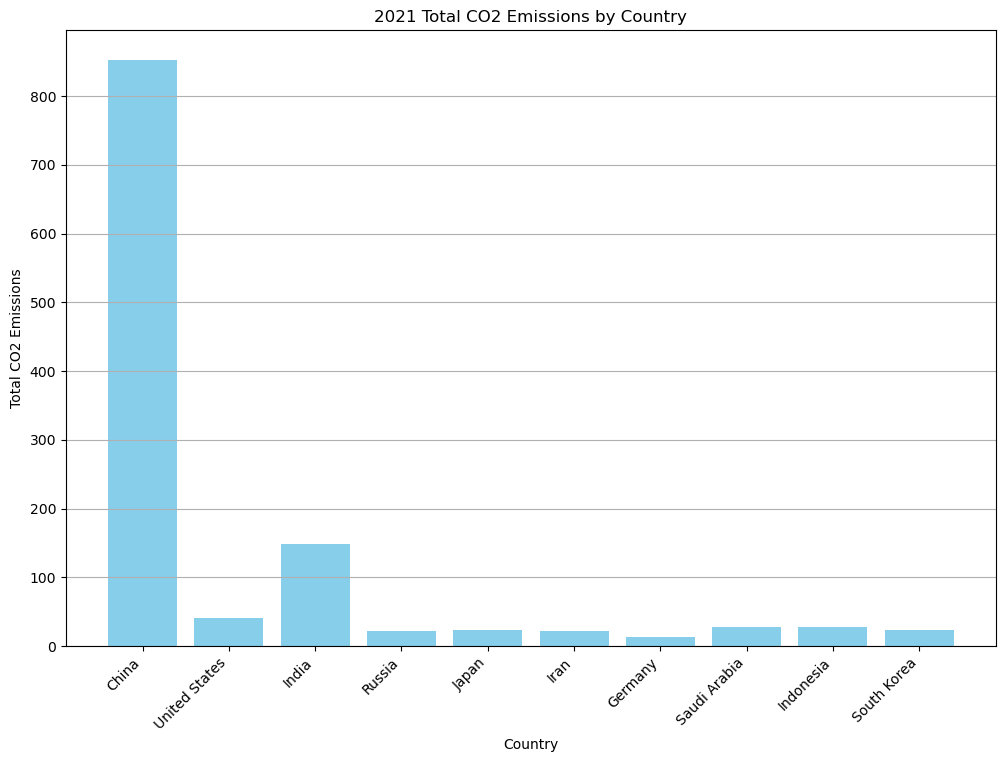

In [22]:
#Show the data as a bar chart

co2 = pd.read_csv("hw_9_q4_part2.csv")

plt.figure(figsize=(12, 8))

plt.bar(co2['Country'], co2['CO2'], color='skyblue')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions')
plt.title('2021 Total CO2 Emissions by Country')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid(axis='y')
plt.show()

5.**International Trade Analysis**
Potential Source: United Nations Comtrade database, World Trade Organization.
Network Diagram (using Matplotlib extensions such as NetworkX): Visualize the trade relationships between countries.
Bar Chart: Compare the total exports and imports of the top trading countries.

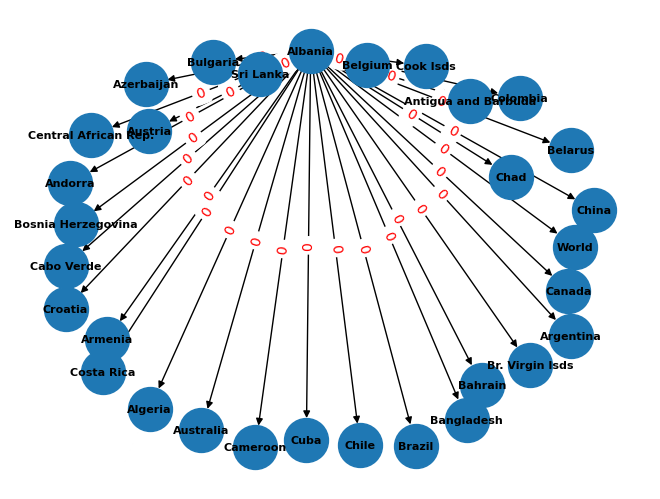

In [29]:
#Your code here:
import networkx as nx

trade_whole = pd.read_csv("hw_9_q5.csv", encoding='latin1')

trade = trade_whole.head(30)

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for _, row in trade.iterrows():
    G.add_edge(row['ReporterDesc'], row['PartnerDesc'], weight=row['Qty'])

# Draw the network graph
pos = nx.spring_layout(G, seed=42)  # You can use different layout algorithms
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, font_color='black', font_weight='bold')

# Add edge labels
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')

# Display the plot
plt.show()

C:\Users\josep\AppData\Local\Temp\ipykernel_17816\1032902042.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade['Total_Exports'] = trade.groupby('ReporterDesc')['Cifvalue'].transform('sum')
C:\Users\josep\AppData\Local\Temp\ipykernel_17816\1032902042.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade['Total_Imports'] = trade.groupby('ReporterDesc')['Fobvalue'].transform('sum')


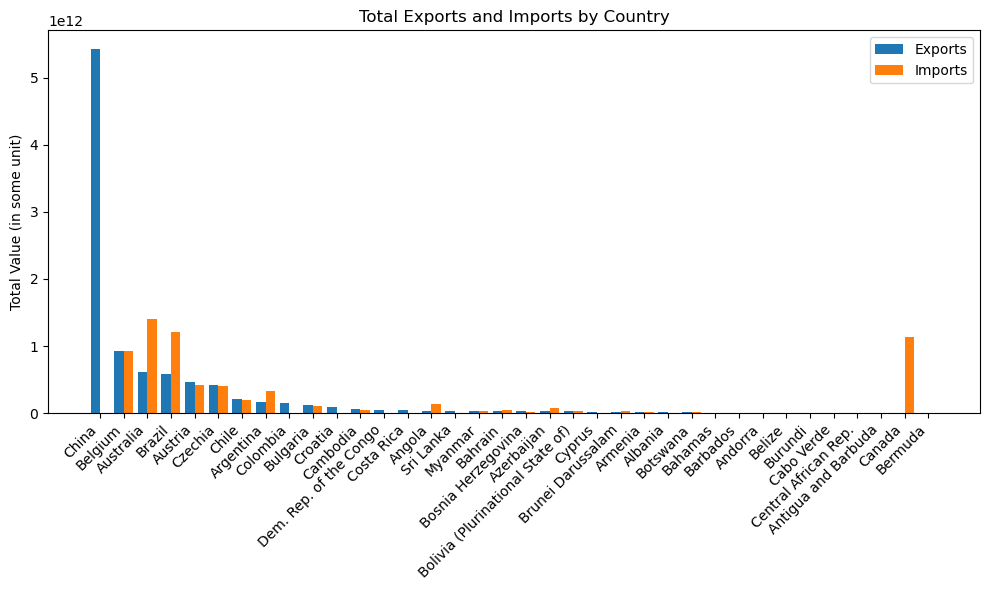

In [34]:
trade_whole = pd.read_csv("hw_9_q5.csv", encoding='latin1')

trade = trade_whole.head(10000)
# Assuming 'Exports' and 'Imports' columns contain the values for exports and imports, respectively
# Replace 'ReporterDesc' with the actual column name containing country names
trade['Total_Exports'] = trade.groupby('ReporterDesc')['Cifvalue'].transform('sum')
trade['Total_Imports'] = trade.groupby('ReporterDesc')['Fobvalue'].transform('sum')

# Drop duplicates to get unique country totals
country_totals = trade[['ReporterDesc', 'Total_Exports', 'Total_Imports']].drop_duplicates()

# Sort the DataFrame by total exports or imports (you can choose either)
country_totals = country_totals.sort_values(by='Total_Exports', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width can be adjusted based on your preference
bar_width = 0.4

# Bar positions
bar_positions_exports = range(len(country_totals))
bar_positions_imports = [pos + bar_width for pos in bar_positions_exports]

# Bar heights
exports_bars = ax.bar(bar_positions_exports, country_totals['Total_Exports'], width=bar_width, label='Exports')
imports_bars = ax.bar(bar_positions_imports, country_totals['Total_Imports'], width=bar_width, label='Imports')

# X-axis labels
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions_exports])
ax.set_xticklabels(country_totals['ReporterDesc'], rotation=45, ha='right')

# Y-axis label
ax.set_ylabel('Total Value (in some unit)')

# Title and legend
ax.set_title('Total Exports and Imports by Country')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

6.**Global Health Expenditure**
Potential Source: World Health Organization Global Health Expenditure database.
Bar Chart: Show the health expenditure as a percentage of GDP by country.
Line Graph: Plot the trend of health expenditure over time for selected countries.

C:\Users\josep\AppData\Local\Temp\ipykernel_17816\1716021581.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[str(year)] = pd.to_numeric(data[str(year)].str.replace(',', ''), errors='coerce')


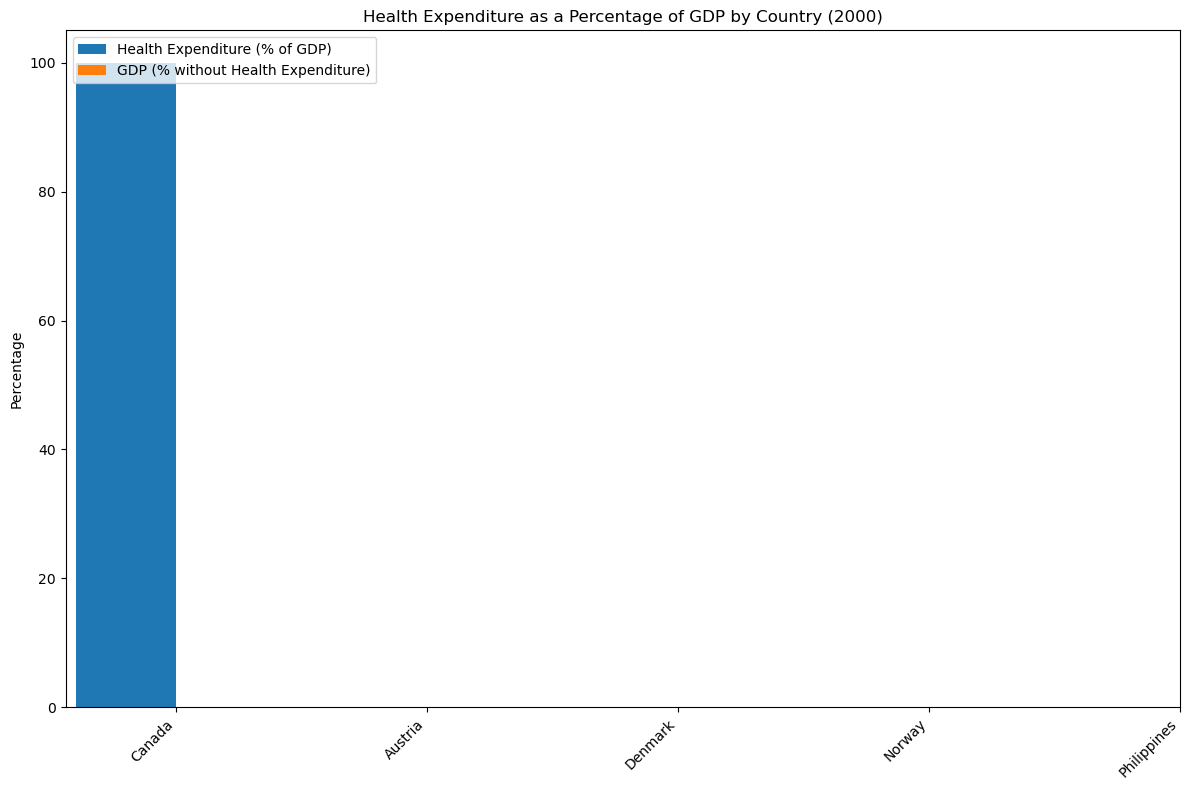

In [40]:
#Your code here:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data with explicit encoding
health_exp = pd.read_csv("hw_9_q6.csv", encoding='ISO-8859-1')

# Select relevant columns for analysis
data = health_exp[['Countries', 'Indicators', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]

# Filter rows where 'Indicators' is 'Capital health expenditure'
health_exp_data = data[data['Indicators'] == 'Capital health expenditure']

# Filter rows where values are not missing (':')
health_exp_data = health_exp_data.replace(':', pd.NA).dropna()

# Remove commas and convert to numeric
for year in range(2000, 2022):
    health_exp_data[str(year)] = pd.to_numeric(health_exp_data[str(year)].str.replace(',', ''), errors='coerce')

# Convert GDP columns to numeric
for year in range(2000, 2022):
    data[str(year)] = pd.to_numeric(data[str(year)].str.replace(',', ''), errors='coerce')

# Calculate health expenditure as a percentage of GDP
for year in range(2000, 2022):
    health_exp_data[str(year)] = (health_exp_data[str(year)] / data[data['Countries'] == health_exp_data['Countries'].iloc[0]][str(year)].replace(':', pd.NA).dropna()).mul(100)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Bar width can be adjusted based on your preference
bar_width = 0.4

# Bar positions
bar_positions = range(len(health_exp_data))
bar_positions_gdp = [pos + bar_width for pos in bar_positions]

# Bar heights
health_exp_bars = ax.bar(bar_positions, health_exp_data['2000'], width=bar_width, label='Health Expenditure (% of GDP)')
gdp_bars = ax.bar(bar_positions_gdp, 100 - health_exp_data['2000'], width=bar_width, label='GDP (% without Health Expenditure)')

# X-axis labels
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(health_exp_data['Countries'], rotation=45, ha='right')

# Y-axis label
ax.set_ylabel('Percentage')

# Title and legend
ax.set_title('Health Expenditure as a Percentage of GDP by Country (2000)')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\josep\AppData\Local\Temp\ipykernel_17816\498374746.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_exp_data[years] = health_exp_data[years].replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')


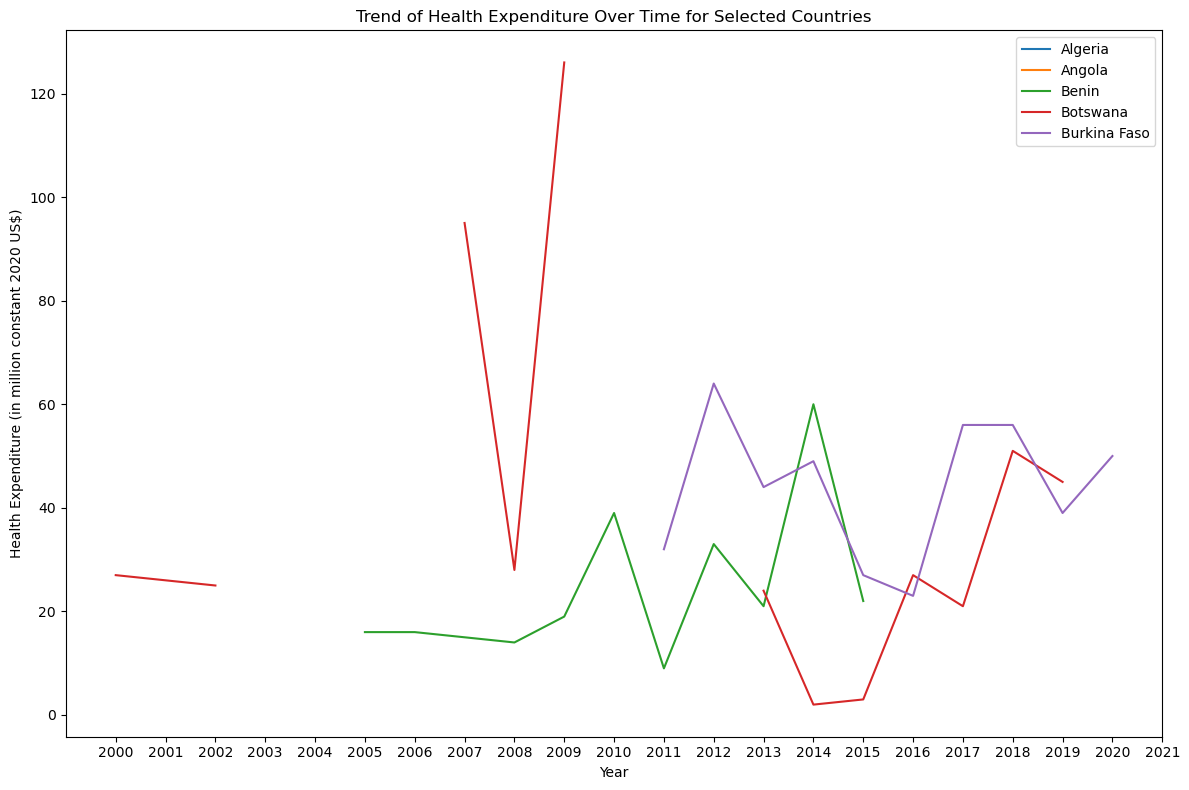

In [46]:
#part 2
import pandas as pd
import matplotlib.pyplot as plt

# Read the data with explicit encoding
health_exp = pd.read_csv("hw_9_q6.csv", encoding='ISO-8859-1')

# Select relevant columns for analysis
data = health_exp[['Countries', 'Indicators', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]

# Filter rows where 'Indicators' is 'Capital health expenditure'
health_exp_data = data[data['Indicators'] == 'Capital health expenditure']

# Remove commas and convert to numeric for the selected columns
years = [str(year) for year in range(2000, 2022)]
health_exp_data[years] = health_exp_data[years].replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot trend for selected countries
selected_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso']

for country in selected_countries:
    country_data = health_exp_data[health_exp_data['Countries'] == country]
    ax.plot(years, country_data.iloc[0, 2:], label=country)

# X-axis and Y-axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Health Expenditure (in million constant 2020 US$)')

# Title and legend
ax.set_title('Trend of Health Expenditure Over Time for Selected Countries')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


7.**Educational Attainment**
Potential Source: UNESCO Institute for Statistics, World Bank Education Statistics.
Bar Chart: Display literacy rates for different age groups within a country.
Box Plot: Show the distribution of average years of schooling across continents.

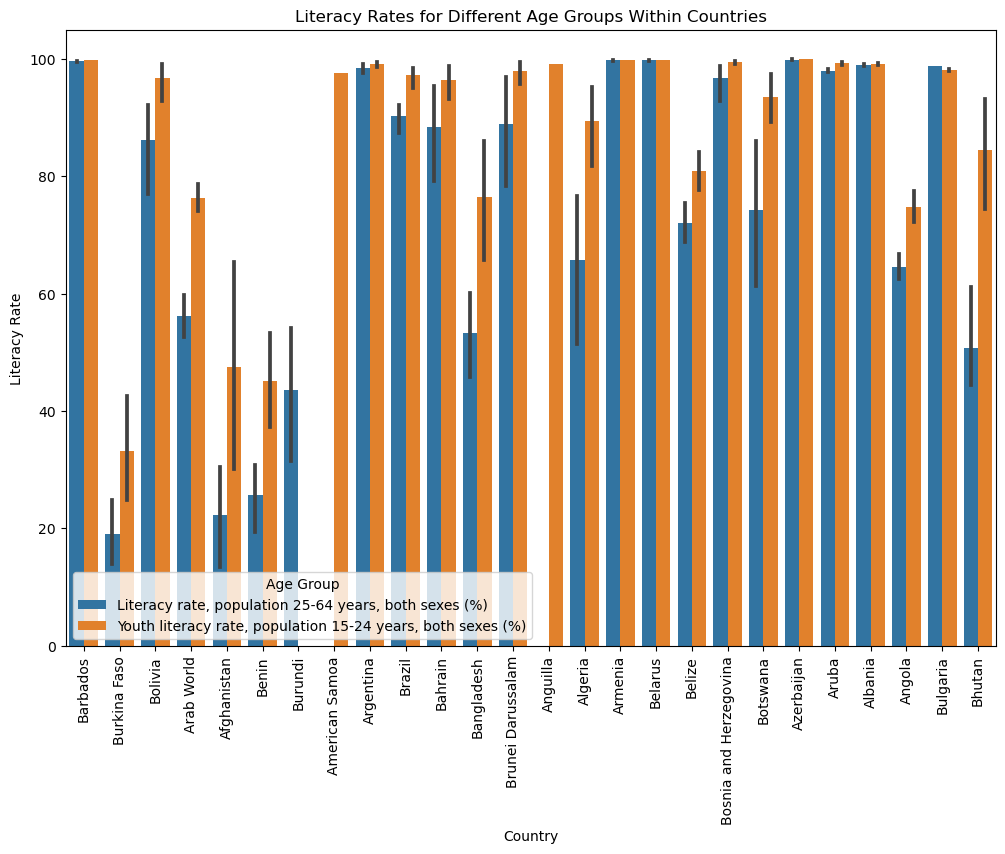

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
literacy_whole = pd.read_csv("hw_9_q7.csv")
literacy = literacy_whole.head(100)

# Melt the DataFrame to convert it to long format
melted_literacy = pd.melt(literacy, id_vars=['Country Name', 'Country Code', 'Series', 'Series Code'],
                          var_name='Year', value_name='Literacy Rate')

# Convert 'Literacy Rate' to numeric
melted_literacy['Literacy Rate'] = pd.to_numeric(melted_literacy['Literacy Rate'], errors='coerce')

# Filter data for the age groups you are interested in
age_groups = ['25-64 years', '15-24 years', '65+ years']
filtered_literacy = melted_literacy[melted_literacy['Series'].str.contains('|'.join(age_groups), na=False)]

# Drop rows with NaN values in the 'Literacy Rate' column
filtered_literacy = filtered_literacy.dropna(subset=['Literacy Rate'])

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Country Name', y='Literacy Rate', hue='Series', data=filtered_literacy)
plt.title('Literacy Rates for Different Age Groups Within Countries')
plt.xlabel('Country')
plt.ylabel('Literacy Rate')
plt.xticks(rotation=90)
plt.legend(title='Age Group')
plt.show()


C:\Users\josep\AppData\Local\Temp\ipykernel_17816\2980876096.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_literacy['Continent'] = filtered_literacy['Country Code'].map(continent_mapping)
C:\Users\josep\AppData\Local\Temp\ipykernel_17816\2980876096.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_literacy[years_columns] = filtered_literacy[years_columns].apply(pd.to_numeric, errors='coerce')
C:\Users\josep\AppData\Local\Temp\ipykernel_17816\2980876096.py:31: SettingWithCopyWarni

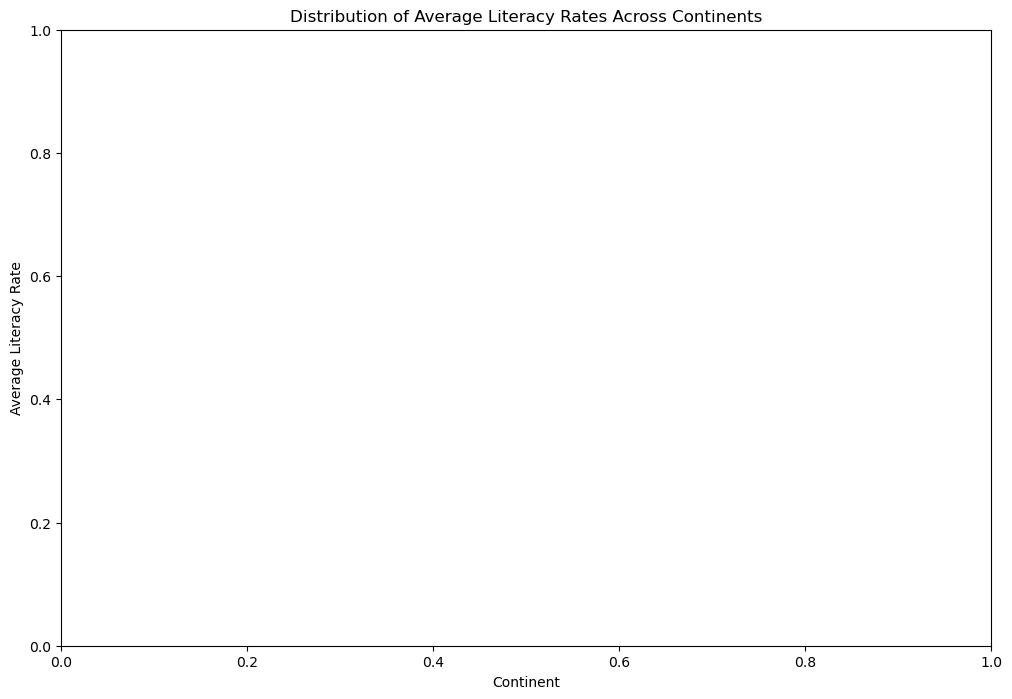

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
literacy = pd.read_csv("hw_9_q7.csv")

# Drop rows where 'Series' column has NaN values
literacy = literacy.dropna(subset=['Series'])

# Filter data for the age groups you are interested in
age_groups = ['25-64 years', '15-24 years', '65+ years']
filtered_literacy = literacy[literacy['Series'].str.contains('|'.join(age_groups))]

# Extract continent information from the country code (this is a simplified mapping)
continent_mapping = {
    'AFG': 'Asia',
    'ALB': 'Europe',
    'DZA': 'Africa',
    # Add more mappings as needed
}

# Map continent information to the dataset
filtered_literacy['Continent'] = filtered_literacy['Country Code'].map(continent_mapping)

# Extract columns representing years
years_columns = filtered_literacy.columns[4:]

# Convert data to numeric and replace NaN values with the mean of the respective column
filtered_literacy[years_columns] = filtered_literacy[years_columns].apply(pd.to_numeric, errors='coerce')
filtered_literacy['Average Literacy Rate'] = filtered_literacy[years_columns].mean(axis=1)

# Drop rows with NaN values in the 'Average Literacy Rate' column
filtered_literacy = filtered_literacy.dropna(subset=['Average Literacy Rate'])

# Check if there is data for each continent
valid_continents = filtered_literacy['Continent'].unique()

# Plot the distribution of average literacy rates across continents
plt.figure(figsize=(12, 8))

for continent in valid_continents:
    continent_data = filtered_literacy[filtered_literacy['Continent'] == continent]
    
    if not continent_data['Average Literacy Rate'].empty:
        sns.boxplot(x='Continent', y='Average Literacy Rate', data=continent_data)

plt.title('Distribution of Average Literacy Rates Across Continents')
plt.xlabel('Continent')
plt.ylabel('Average Literacy Rate')
plt.show()


8.**Renewable Energy Usage**
Potential Source: International Energy Agency, The World Bank.
Pie Chart: Illustrate the proportion of different types of renewable energy sources in a country's energy mix.
Stacked Area Chart: Show the change in renewable versus non-renewable energy consumption over time in a country.

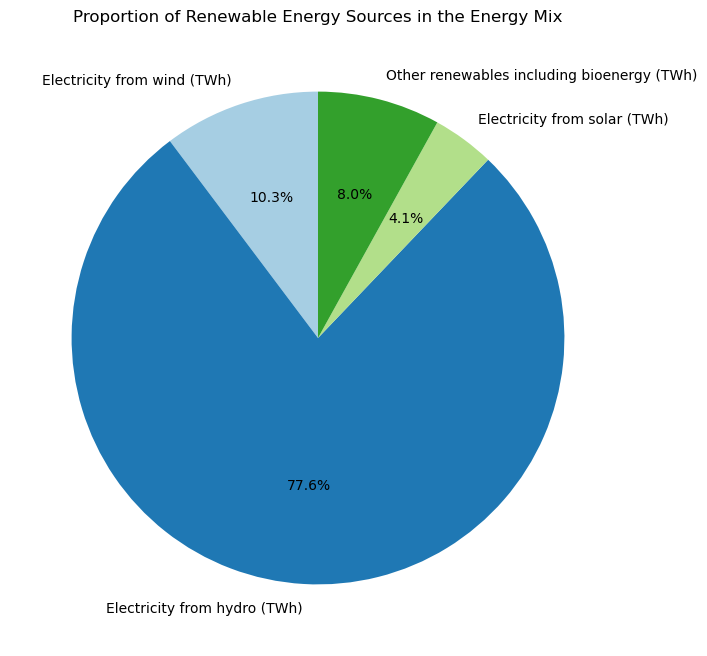

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
energy = pd.read_csv("hw_9_q8_renew_compare.csv")

# Define the renewable energy sources
renewable_sources = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

# Sum the values for each renewable source
total_by_source = energy[renewable_sources].sum()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_by_source, labels=total_by_source.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proportion of Renewable Energy Sources in the Energy Mix')
plt.show()


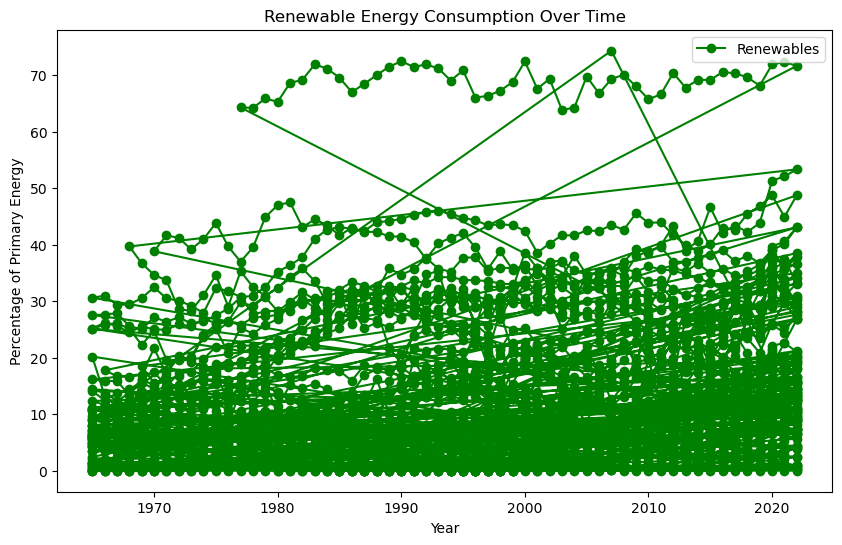

In [73]:
#part 2
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
total = pd.read_csv("hw_9_q8_renew_total_percent.csv")

# Set the 'Year' column as the index
total.set_index('Year', inplace=True)

# Create a line chart for the 'Renewables (% equivalent primary energy)' column
plt.figure(figsize=(10, 6))
plt.plot(total.index, total['Renewables (% equivalent primary energy)'], label='Renewables', color='green', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of Primary Energy')
plt.title('Renewable Energy Consumption Over Time')
plt.legend()

# Show the plot
plt.show()


9.**Global Unemployment Trends**
Potential Source: International Labour Organization, The World Bank.
Line Graph: Track the unemployment rate over time for a group of countries.
Bar Chart: Compare the unemployment rates across countries at a specific point in time.


In [ ]:
#Your code here:
# The people are 25+ in my data

10.**Life Expectancy and Health Factors**
Potential Source: Global Health Observatory data from the World Health Organization, Human Development Reports from the United Nations Development Programme.
Scatter Plot: Show the correlation between life expectancy and a health factor like BMI or smoking rates.
Violin Plot: Display the distribution of life expectancy across different regions.


In [ ]:
#Your code here:
